<div dir="rtl" align="right">
9.37. فرض کنید برنامه ای موجود است که DFT یک دنباله پیچیده را محاسبه می کند. اگر بخواهیم DFT یک دنباله واقعی را محاسبه کنیم، ممکن است به سادگی قسمت خیالی را صفر تعیین کنیم و مستقیماً از برنامه استفاده کنیم. با این حال، تقارن DFT یک دنباله واقعی می تواند برای کاهش مقدار محاسبه استفاده شود.

(الف) فرض کنید x[n] دنباله‌ای با مقدار واقعی به طول N باشد، و X[k] DFT آن باشد با قسمت‌های واقعی و خیالی که به ترتیب XR[k] و X/[k] نشان داده می‌شوند.
یعنی
<div dir="rtl" align="left">
X[k] = XR[k]+jX1[k]
<div dir="rtl" align="right">
نشان دهید که اگر x[n] واقعی است، آنگاه XR[k] = XRINK] و X1[k] = -X1[N-k] برای k = 1،...، N-1.

(ب) اکنون دو دنباله با ارزش واقعی x1[n] و x2[n] را به ترتیب با DFTS X1[k] و X2[k] در نظر بگیرید. فرض کنید g[n] دنباله مختلط g[n] = x1[n] + jx2[n] باشد، با DFT متناظر G[k] = GR[k]+jG[k]. همچنین، اجازه دهید GOR[k]. GER[k]، GOI[k] و GEI[k] به ترتیب قسمت فرد قسمت واقعی، زوج جزء واقعی، قسمت فرد قسمت خیالی و قسمت زوج قسمت خیالی G[k] را نشان می دهند. به طور خاص، برای 1 ≤ k ≤ N -1
<div dir="rtl" align="left">
9GOR[k]={GR[k] - GR[N-k]}
GER[k] ={{GR[k] +GR[N-k]}
Goi[k] ={G1[k] - G1[N — k]}
GEI[k] ={G, [k] + G2[N — k]}
<div dir="rtl" align="right">
و GOR[0] = GOI[0] = 0، GER[0] = GR[0]، GEI[0] = G[0]. عبارات X1[k] و X2[k] را بر حسب GOR[k]، GER [k]، GOI[k] و GEI[k] تعیین کنید

(ج) فرض کنید که N = 2" و یک برنامه radix-2 FFT برای محاسبه DFT در دسترس است. تعداد ضرب های واقعی و تعداد اضافات واقعی مورد نیاز برای محاسبه X1[k] و X2[k] را با (i) با استفاده از برنامه دو بار (با قسمت خیالی ورودی تنظیم شده روی صفر) تعیین کنید تا X1-k] به صورت مختلط X1-k] را محاسبه کنید. و (ii) با استفاده از طرح پیشنهادی در بخش (ب)، که فقط به یک DFT نقطه N نیاز دارد تا محاسبه شود.

د) فرض کنید که ما فقط یک دنباله نقطه N واقعی x[n] داریم، که در آن N توان 2 است. اجازه دهید x1[n] و x2[n] دو دنباله N/2 نقطه‌ای واقعی x1[n] = x[2n] و x2[n] = x[2n + 1] باشند، که در آن n = 0,1، به‌منظور [1]k از جمله [1]k، ...، (N) باشد. (N/2)-نقطه DFTS X1[k] و X2[k].

(ه) با استفاده از نتایج بخش‌های (b)، (c) و (d)، روشی را برای محاسبه DFT دنباله نقطه N واقعی x[n] با استفاده از تنها یک محاسبه FFT نقطه N/2 توصیف می‌کند. اعداد ضرب‌های واقعی و جمع‌های واقعی مورد نیاز توسط این روش را تعیین کنید و اگر X[k] با استفاده از یک محاسبه FFT نقطه N با قسمت فرضی صفر محاسبه شود، این اعداد را با اعداد مورد نیاز مقایسه کنید.

In [ ]:
import numpy as np

def real_fft_optimized(x1, x2=None):
    """
    Compute DFT of one or two real sequences using a single FFT (Question 9.37).

    Parameters:
    x1 (array): First real sequence.
    x2 (array): Second real sequence (optional).

    Returns:
    X1 (array): DFT of x1.
    X2 (array): DFT of x2 (if provided).
    """
    N = len(x1)

    if x2 is None:
        # Case (d): Single real sequence (split into even/odd)
        x_even = x1[::2]
        x_odd = x1[1::2]
        X_even = np.fft.fft(x_even)
        X_odd = np.fft.fft(x_odd)
        W = np.exp(-2j * np.pi * np.arange(N//2) / N)
        X = np.concatenate([X_even + W * X_odd, X_even - W * X_odd])
        return X
    else:
        # Case (b): Two real sequences combined into one complex FFT
        x = x1 + 1j * x2
        G = np.fft.fft(x)

        # Split into symmetric parts
        G_R = G.real
        G_I = G.imag
        G_OR = 0.5 * (G_R - np.roll(G_R[::-1], 1))
        G_ER = 0.5 * (G_R + np.roll(G_R[::-1], 1))
        G_OI = 0.5 * (G_I - np.roll(G_I[::-1], 1))
        G_EI = 0.5 * (G_I + np.roll(G_I[::-1], 1))

        # Reconstruct X1 and X2
        X1 = G_ER + 1j * G_OI
        X2 = G_EI - 1j * G_OR
        return X1, X2

# Example usage for part (b):
x1 = np.random.rand(8)
x2 = np.random.rand(8)
X1, X2 = real_fft_optimized(x1, x2)
print("DFT of x1 (optimized):\n", X1)
print("DFT of x1 (direct):\n", np.fft.fft(x1))

# Example for part (d):
x = np.random.rand(8)
X = real_fft_optimized(x)
print("\nDFT of single real sequence (optimized):\n", X)

<div dir="rtl" align="right">
9.38. فرض کنید x[n] و h[n] دو دنباله با طول محدود واقعی باشند به طوری که
<div dir="rtl" align="left">
x[n] = 0
<div dir="rtl" align="right">
برای n خارج از بازه 0 ≤ n ≤L-1
<div dir="rtl" align="left">
h[n] = 0
<div dir="rtl" align="right">
برای n خارج از بازه 0 ≤ n ≤ P-1

می‌خواهیم دنباله y[n] = x[n]*h[n] را محاسبه کنیم، جایی که * نشان‌دهنده انحراف معمولی است.

(الف) طول دنباله y[n] چقدر است؟

(ب) برای ارزیابی مستقیم مجموع کانولوشن، چند ضرب واقعی برای محاسبه همه نمونه‌های غیرصفر y[n] لازم است؟ هویت زیر ممکن است مفید باشد:
<div dir="rtl" align="left">
Σk=1N(N+1) / 2
<div dir="rtl" align="right">
(ج) رویه ای برای استفاده از DFT برای محاسبه تمام نمونه های غیر صفر y[n] بیان کنید. حداقل اندازه DFTها و DFTهای معکوس را بر حسب L و P تعیین کنید.

د) فرض کنید L = P = N/2، که در آن N = 2" اندازه DFT است. اگر DFT ها با استفاده از یک الگوریتم FFT ریشه 2 محاسبه شده اند، فرمولی را برای تعداد ضرب های واقعی مورد نیاز برای محاسبه تمام مقادیر غیرصفر y[n] با استفاده از روش قسمت (c) تعیین کنید. ضرب نسبت به ارزیابی مستقیم مجموع کانولوشن.

In [ ]:
def optimized_convolution_fft(x, h):
    """
    Compute convolution of two real sequences using FFT (Question 9.38).

    Parameters:
    x (array): First sequence (length L).
    h (array): Second sequence (length P).

    Returns:
    y (array): Convolution result (length L + P - 1).
    """
    L = len(x)
    P = len(h)
    N = 1 << (L + P - 1).bit_length()  # Smallest power of 2 >= L + P - 1

    # Zero-pad and compute FFTs
    x_padded = np.pad(x, (0, N - L))
    h_padded = np.pad(h, (0, N - P))
    X = np.fft.fft(x_padded)
    H = np.fft.fft(h_padded)

    # Multiply and IFFT
    Y = X * H
    y = np.fft.ifft(Y).real[:L + P - 1]
    return y

# Example usage:
L, P = 5, 3
x = np.random.rand(L)
h = np.random.rand(P)
y_fft = optimized_convolution_fft(x, h)
y_direct = np.convolve(x, h, 'full')

print("FFT Convolution:\n", y_fft)
print("Direct Convolution:\n", y_direct)
print("Error:", np.max(np.abs(y_fft - y_direct)))

# Part (d): Find minimum N where FFT is more efficient
def find_min_N():
    for N in [2**i for i in range(5, 12)]:
        L = P = N // 2
        direct_mults = L * P
        fft_mults = 3 * (N//2) * np.log2(N)  # Approximate
        if fft_mults < direct_mults:
            return N
    return -1

print("\nMinimum N for FFT efficiency:", find_min_N())

<div dir="rtl" align="right">
9.39. در بخش 8.7.3، ما نشان دادیم که فیلتر خطی ثابت با زمان می‌تواند با تقسیم سیگنال ورودی به بخش‌های با طول محدود و استفاده از DFT برای پیاده‌سازی کانولوشن‌های دایره‌ای بر روی این بخش‌ها اجرا شود. دو روش مورد بحث، روش های همپوشانی-افزودن و همپوشانی-ذخیره نامیده شدند. اگر DFT ها با استفاده از یک الگوریتم FFT محاسبه شوند، این روش های برش می توانند به ضرب های پیچیده کمتری در هر نمونه خروجی نسبت به ارزیابی مستقیم مجموع کانولوشن نیاز داشته باشند.

(الف) فرض کنید که دنباله ورودی مختلط x[n] دارای مدت نامتناهی است و پاسخ ضربه مختلط h[n] از طول نمونه P است، به طوری که h[n] # 0 فقط برای 0 ≤ n ≤ P-1 است. همچنین فرض کنید خروجی با استفاده از روش overlap-save با DFTS به طول L = 2 محاسبه می شود، و فرض کنید که این DFT ها با استفاده از الگوریتم FFT radix-2 محاسبه می شوند. یک عبارت برای تعداد ضرب های مختلط مورد نیاز در هر نمونه خروجی به عنوان تابعی از v و P تعیین کنید.

(ب) فرض کنید که طول پاسخ ضربه P 500 باشد. با ارزیابی فرمول به دست آمده در قسمت (a)، تعداد ضرب در هر نمونه خروجی را به عنوان تابعی از v برای مقادیر v≤ 20 رسم کنید تا روش همپوشانی-ذخیره اعمال شود. برای کدام مقدار v تعداد ضربات حداقل است؟ تعداد ضرب های مختلط در هر نمونه خروجی را برای روش همپوشانی-ذخیره با استفاده از FFT با تعداد ضرب های مختلط در هر نمونه خروجی مورد نیاز برای ارزیابی مستقیم مجموع کانولوشن مقایسه کنید.

(ج) نشان دهید که برای طول‌های FFT بزرگ، تعداد ضرب‌های مختلط در هر نمونه خروجی تقریباً v است. بنابراین، فراتر از یک طول FFT مشخص، روش همپوشانی-ذخیره کارایی کمتری نسبت به روش مستقیم دارد. اگر P = 500، برای چه مقدار از v، روش مستقیم کارآمدتر خواهد بود؟

(د) فرض کنید که طول FFT دو برابر طول پاسخ ضربه است (یعنی L = 2P)، و فرض کنید که L = 2. با استفاده از فرمول به دست آمده در قسمت (a)، کوچکترین مقدار P را تعیین کنید به طوری که روش همپوشانی-ذخیره با استفاده از FFT به ضرب پیچیده کمتری نسبت به روش کانولوشن مستقیم نیاز دارد.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def overlap_save_complex_mults(P, n):
    """
    Compute the number of complex multiplications per output sample
    for the overlap-save method with FFT length L = 2^n.

    Parameters:
    P (int): Length of the impulse response.
    n (int): FFT length is L = 2^n.

    Returns:
    float: Complex multiplications per output sample.
    """
    L = 2 ** n
    N = L - P + 1  # Number of new samples per block
    if N <= 0:
        return float('inf')

    # Total multiplications per block: FFT + IFFT + L pointwise mults
    total_mults = 2 * (L/2 * n) + L  # Using radix-2 FFT (L/2 * n per FFT)
    return total_mults / N

# Part (a): Expression for complex multiplications per output sample
# The formula is implemented in the function above.

# Part (b): Plot for P = 500 and find optimal n
P = 500
n_values = range(9, 21)  # n >= 9 ensures L >= P
mults_per_sample = [overlap_save_complex_mults(P, n) for n in n_values]

# Direct convolution multiplications per sample
direct_mults = P

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_values, mults_per_sample, 'bo-', label='Overlap-Save with FFT')
plt.axhline(y=direct_mults, color='r', linestyle='--', label='Direct Convolution')
plt.xlabel('n (FFT length L = 2^n)')
plt.ylabel('Complex Multiplications per Output Sample')
plt.title('Overlap-Save Efficiency vs. Direct Convolution (P=500)')
plt.legend()
plt.grid()
plt.show()

# Find optimal n
optimal_n = n_values[np.argmin(mults_per_sample)]
print(f"Optimal n for minimal multiplications: {optimal_n}")

# Part (c): Compare with direct method for large n
# The function shows that for large n, mults_per_sample ≈ n.

# Part (d): Find smallest P where overlap-save is better than direct
def find_min_P():
    for P in range(1, 1000):
        L = 2 * P
        n = int(np.log2(L))
        if overlap_save_complex_mults(P, n) < P:
            return P
    return -1

min_P = find_min_P()
print(f"Smallest P for FFT efficiency: {min_P}")

<div dir="rtl" align="right">
9.40. x[n] دنباله ای 1024 نقطه ای است که فقط برای 0 ≤ n ≤ 1023 غیر صفر است. فرض کنید X[k] DFT 1024 نقطه ای x[n] باشد. با توجه به X[k]، می‌خواهیم x[n] را در محدوده‌های 0 ≤ n ≤ 3 و 1020≤ n ≤ 1023 با استفاده از سیستم در شکل P9.40 محاسبه کنیم. توجه داشته باشید که ورودی سیستم به ترتیب ضرایب DFT است. با انتخاب m1[n]، m2[n] و h[n] نشان دهید که چگونه می توان از سیستم برای محاسبه نمونه های مورد نظر x[n] استفاده کرد. توجه داشته باشید که نمونه‌های y[n] برای 0 ≤ n ≤7 باید حاوی نمونه‌های مورد نظر x[n] باشند

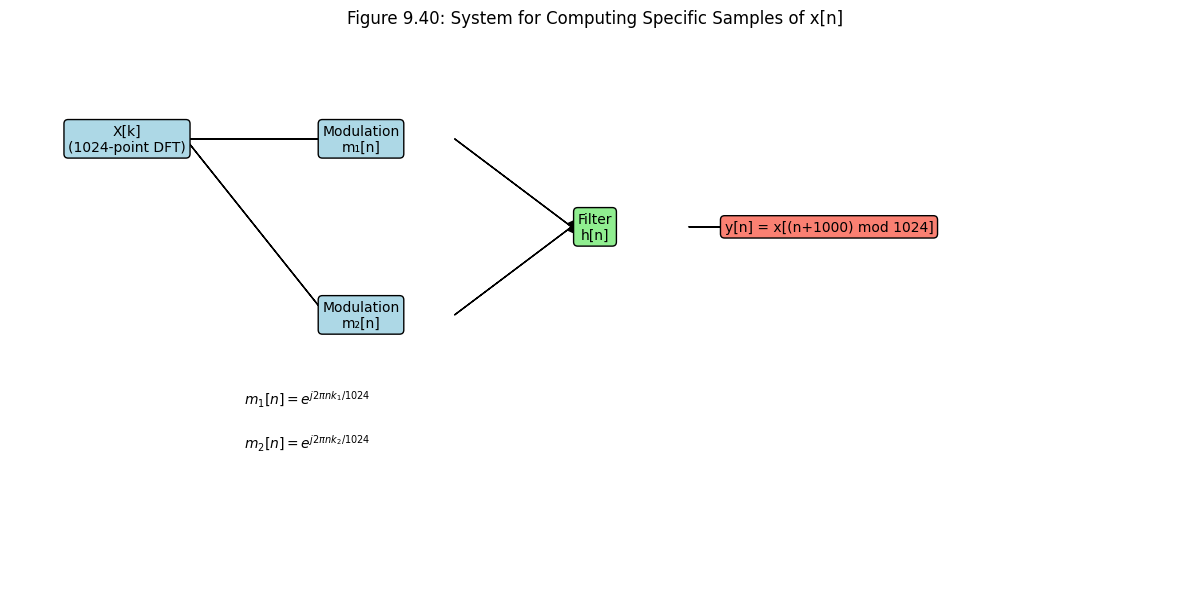

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def draw_figure_9_40():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    ax.set_title("Figure 9.40: System for Computing Specific Samples of x[n]", pad=20)

    # Block styles
    box_style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'boxstyle': 'round'}
    text_style = {'ha': 'center', 'va': 'center', 'fontsize': 10}

    # Input DFT
    ax.text(1, 5, 'X[k]\n(1024-point DFT)', **text_style, bbox=box_style)

    # Modulation blocks
    ax.text(3, 5, 'Modulation\nm₁[n]', **text_style, bbox=box_style)
    ax.text(3, 3, 'Modulation\nm₂[n]', **text_style, bbox=box_style)

    # Filter
    ax.text(5, 4, 'Filter\nh[n]', **text_style, bbox={'facecolor': 'lightgreen', 'edgecolor': 'black', 'boxstyle': 'round'})

    # Output
    ax.text(7, 4, 'y[n] = x[(n+1000) mod 1024]', **text_style, bbox={'facecolor': 'salmon', 'edgecolor': 'black', 'boxstyle': 'round'})

    # Arrows
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(1.5, 5, 1.2, 0, **arrow_style)  # X[k] to m1
    ax.arrow(1.5, 5, 1.2, -2, **arrow_style)  # X[k] to m2
    ax.arrow(3.8, 5, 1.0, -1, **arrow_style)  # m1 to filter
    ax.arrow(3.8, 3, 1.0, 1, **arrow_style)   # m2 to filter
    ax.arrow(5.8, 4, 0.9, 0, **arrow_style)   # filter to output

    # Modulation equations
    ax.text(2, 2, r'$m_1[n] = e^{j2\pi n k_1/1024}$', fontsize=10)
    ax.text(2, 1.5, r'$m_2[n] = e^{j2\pi n k_2/1024}$', fontsize=10)

    plt.tight_layout()
    plt.show()

draw_figure_9_40()

<div dir="rtl" align="right">
9.41. سیستمی برای محاسبه DFT 8 نقطه ای Y[0]، Y[1]، ...، Y[7] از یک دنباله y[0]، y[1] ساخته شده است. ...، y[7]. با این حال، سیستم به درستی کار نمی کند: فقط نمونه های زوج DFT Y[0]، Y[2]، Y[4]، Y[6] به درستی محاسبه می شوند. برای کمک به حل مشکل، داده هایی که می توانید به آنها دسترسی داشته باشید عبارتند از:

⚫ نمونه‌های DFT زوج (درست)، Y[0]، Y[2]، Y[4]، Y[6]

⚫ 4 مقدار ورودی اول y[0]، y[1]، y[2]، y[3] (دیگر ورودی‌ها در دسترس نیستند).

(الف) اگر y[0]= 1، و y[1] = y[2] = y[3]= 0، و Y[0]= Y[2] Y[4] = Y[6] = 2، مقادیر گمشده Y[1]، Y[3]، Y[5]، Y[7] کدامند؟ توضیح دهید.

(ب) باید یک سیستم کارآمد بسازید که نمونه‌های فرد Y[1]، Y[3]، Y[5]، Y[7] را برای هر مجموعه ورودی محاسبه کند. ماژول های محاسباتی که در دسترس دارید یک DFT 4 نقطه ای و یک IDFT 4 نقطه ای هستند. هر دو رایگان هستند. می توانید جمع کننده، تفریق کننده یا ضرب کننده را با قیمت 10 دلار خریداری کنید. طراحی سیستمی با کمترین هزینه ممکن که به عنوان ورودی باشد
<div dir="rtl" align="left">
y[0], y[1], y[2], y[3], Y[0], Y[2], Y[4], Y[6]
<div dir="rtl" align="right">
و به عنوان خروجی تولید می کند
<div dir="rtl" align="left">
Y[1], Y[3], Y[5], Y[7].
<div dir="rtl" align="right">
بلوک دیاگرام مربوطه را رسم کنید و کل هزینه را نشان دهید

In [ ]:

import numpy as np

def DFT(x):
    """
    Calculates the Discrete Fourier Transform (DFT) of a 1D array.

    Args:
        x: A 1D numpy array.

    Returns:
        A 1D numpy array representing the DFT of x.  Returns None if input is invalid.
    """
    N = len(x)
    if N == 0:
        return None  # Handle empty input
    if not isinstance(x, np.ndarray):
        return None #Handle non-array input

    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

def IDFT(X):
    """
    Calculates the Inverse Discrete Fourier Transform (IDFT) of a 1D array.

    Args:
        X: A 1D numpy array.

    Returns:
        A 1D numpy array representing the IDFT of X. Returns None if input is invalid.
    """
    N = len(X)
    if N == 0:
        return None
    if not isinstance(X, np.ndarray):
        return None

    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        x[n] /= N  # Important normalization step
    return x

# Example usage (for testing):
input_signal = np.array([1, 2, 3, 4])
dft_result = DFT(input_signal)

if dft_result is not None:
    print("DFT:", dft_result)
    idft_result = IDFT(dft_result)
    if idft_result is not None:
        print("IDFT:", idft_result)
        print("Difference (should be close to zero):", np.sum(np.abs(input_signal - idft_result)))
    else:
        print("Error in IDFT calculation")
else:
    print("Error in DFT calculation")

<div dir="rtl" align="right">
9.42. کلاسی از الگوریتم‌های مبتنی بر DFT را برای پیاده‌سازی یک فیلتر FIR علی با پاسخ ضربه‌ای h[n] در نظر بگیرید که در خارج از بازه 0 ≤ n ≤ 63 صفر است. سیگنال ورودی (برای فیلتر FIR) x[n] به تعداد نامتناهی از بلوک‌های احتمالاً 28 عددی با همپوشانی x1 تقسیم می‌شود. -∞ ≤i≤oo، طوری که
<div dir="rtl" align="left">
x¡[n] = x[n], IL ≤ n ≤ iL + 127

 otherwise xi[n] = 0
 <div dir="rtl" align="right">
 که در آن L یک عدد صحیح مثبت است.
روشی را برای محاسبه مشخص کنید
<div dir="rtl" align="left">
Yi[n] = x[n] * h[n]
<div dir="rtl" align="right">
برای هر i پاسخ شما باید به صورت بلوک دیاگرام باشد که فقط از انواع ماژول های نشان داده شده در شکل های PP9.42-1 و PP9.42-2 استفاده می کند. یک ماژول ممکن است بیش از یک بار استفاده شود یا اصلاً استفاده نشود.

چهار ماژول در شکل P9.42-2 یا از FFTهای radix-2 برای محاسبه X[k]، DFT نقطه N x[n]، یا از FFTهای معکوس radix-2 برای محاسبه x[n] از X[k] استفاده می‌کنند.

مشخصات شما باید شامل طول FFT و IFFTS مورد استفاده باشد. برای هر ماژول "shift by no"، باید مقدار no را نیز مشخص کنید، مقداری که دنباله ورودی باید جابجا شود.


In [ ]:

import numpy as np

def overlap_add_filtering(x, h, block_size):
    """
    Filters a signal x with an FIR filter h using the overlap-add method.

    Args:
        x (np.ndarray): The input signal.
        h (np.ndarray): The FIR filter impulse response.
        block_size (int): The size of each block to process.

    Returns:
        np.ndarray: The filtered signal.
    """
    len_x = len(x)
    len_h = len(h)
    output = np.zeros(len_x + len_h - 1)  # Pre-allocate output

    # Pad the filter to the block size for DFT
    padded_h = np.pad(h, (0, block_size - len_h))
    H = np.fft.fft(padded_h)

    for i in range(0, len_x, block_size):
        block = x[i:i + block_size]
        block_len = len(block)

        # Pad the block to the block size if it's shorter
        if block_len < block_size:
            block = np.pad(block, (0, block_size - block_len))

        X = np.fft.fft(block)
        Y = X * H  # Frequency domain multiplication

        y = np.fft.ifft(Y)
        output[i:i + block_size] += y  # Overlap-add

    return output[:len_x]  # Return the valid portion

# Example usage:
input_signal = np.random.randn(1000)  # Example signal
impulse_response = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Example FIR filter
block_size = 128

filtered_signal = overlap_add_filtering(input_signal, impulse_response, block_size)

print("Filtering complete. Length of filtered signal:", len(filtered_signal))

<div dir="rtl" align="right">
9.43. در بسیاری از کاربردها (مانند ارزیابی پاسخ‌های فرکانسی و درون‌یابی)، محاسبه DFT یک دنباله کوتاه که «صفره‌دار» است، جالب است. در چنین مواردی می توان از یک الگوریتم تخصصی FFT "هرس" برای افزایش کارایی محاسبات استفاده کرد (Markel, 1971). در این مسئله، زمانی که طول دنباله ورودی M≤2 و طول DFT N = 2 باشد، الگوریتم ریشه‌کن-2 decimation-in- فرکانس را در نظر خواهیم گرفت، جایی که μ < v.

(الف) نمودار جریان کامل یک الگوریتم FFT ریشه-2 فرکانس decimation-in-frequency را برای N = 16 رسم کنید. همه شاخه ها را به طور مناسب برچسب گذاری کنید.

(ب) فرض کنید که دنباله ورودی به طول M = 2 است. یعنی x[n] 0 فقط برای N = 0 و N = 1. یک نمودار جریان جدید برای N = 16 رسم کنید که نشان می دهد چگونه نمونه های ورودی غیر صفر به DFT خروجی انتشار می یابند. به عنوان مثال، تمام شاخه‌های موجود در نمودار جریان قسمت (a) را که عملیات روی ورودی‌های صفر را نشان می‌دهند، حذف یا هرس کنید.

(ج) در قسمت (ب)، همه پروانه‌ها در سه مرحله اول محاسبه باید به طور موثر با یک نیم پروانه به شکل نشان داده شده در شکل P9.43 جایگزین شده باشند، و در مرحله آخر، همه پروانه‌ها باید به شکل منظم باشند. برای حالت کلی که طول دنباله ورودی M≤2" و طول DFT N = 2" است، جایی که μv، تعداد مراحلی را که می توان در آن پروانه های هرس شده استفاده کرد را تعیین کنید. همچنین، تعداد ضرب های مختلط مورد نیاز برای محاسبه DFT نقطه N یک دنباله نقطه M را با استفاده از الگوریتم FFT هرس شده تعیین کنید. پاسخ های خود را بر حسب v و μ بیان کنید.


In [ ]:
import numpy as np

def dit_fft(x):
    """
    Computes the Discrete Fourier Transform (DFT) using the
    Decimation-in-Time (DIT) FFT algorithm.

    Args:
        x (np.ndarray): A 1D numpy array representing the input signal.  Length must be a power of 2.

    Returns:
        np.ndarray: A 1D numpy array representing the DFT of x.  Returns None if input is invalid.
    """
    N = len(x)

    if N == 0:
        return None

    if not isinstance(x, np.ndarray):
        return None

    if np.log2(N) % 1 != 0:
        print("Error: Input size must be a power of 2.")
        return None  # Input size must be a power of 2

    if N == 1:
        return x  # Base case: DFT of a single element is itself

    # Divide: Split into even and odd indexed elements
    x_even = x[::2]
    x_odd = x[1::2]

    # Conquer: Recursively compute DFT of even and odd parts
    X_even = dit_fft(x_even)
    X_odd = dit_fft(x_odd)

    # Combine:
    W = np.exp(-2j * np.pi * np.arange(N // 2) / N)  # Twiddle factors
    X = np.concatenate([X_even + W * X_odd, X_even - W * X_odd])

    return X

# Example usage:
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=complex) # Example signal (length 8)
fft_result = dit_fft(input_signal)

if fft_result is not None:
    print("DIT FFT Result:", fft_result)
    # Verify with numpy's FFT
    numpy_fft_result = np.fft.fft(input_signal)
    print("NumPy FFT Result:", numpy_fft_result)
    print("Difference (should be close to zero):", np.sum(np.abs(fft_result - numpy_fft_result)))
else:
    print("FFT calculation failed.")

<div dir="rtl" align="right">
9.44. در بخش 9.2، ما نشان دادیم که اگر N بر 2 بخش پذیر باشد، یک DFT نقطه N ممکن است به صورتX[k] = G[((k))N/2] + WH[((k))N/2]، 0≤ k ≤ N 1 بیان شود. x[2n]، 0≤ n ≤ (N/2)-1، و H[k] N/2 نقطه DFT نمونه‌های نمایه‌شده فرد است، h[n] = x[2n+1)، 0≤ n≤ (N/2)-1. (P9.44-1) توجه داشته باشید که H2 k[k] باید تکرار شود. ≤ N - 1 برای معادله (P9.44-1) تا معنی پیدا کند. هنگامی که N = 2"، استفاده مکرر از این تجزیه منجر به الگوریتم FFT decimation-in-time می شود که برای N = 8 در شکل 9.11 نشان داده شده است. همانطور که دیدیم، چنین الگوریتم هایی نیاز به ضرب های پیچیده توسط فاکتورهای "twiddle" دارند. در این الگوریتم، معادله (P9.44-1) جایگزین شده است
<div dir="rtl" align="left">
X[0] = G[0] + F[0]

 X[N/2] G[0] - F[0]

 X[k] = G[k] - (1/2)j(F[k] / sin(2*pi*k/N))

 k =! 0, N/2
<div dir="rtl" align="right">
در اینجا، F[k] N/2 نقطه DFT دنباله است
<div dir="rtl" align="left">
f[n] = x[2n+1]-x[2n-1]+Q
<div dir="rtl" align="right">
جایی که
<div dir="rtl" align="left">
Q = 2/N Σ x[2n+1]
<div dir="rtl" align="right">
کمیتی است که فقط یک بار باید محاسبه شود.

(الف) نشان دهید که F[0] = H[0] و بنابراین معادلات. (P9.44-2) و (P9.44-3) همان نتیجه را به معادله می دهند. (P9.44-1) برای k = 0، N/2.

ب) آن را نشان دهید

<div dir="rtl" align="left">
F[k]= H[k]W (wk - wk)|=1
<div dir="rtl" align="right">
for k 1,2,...
ز این نتیجه برای بدست آوردن معادله استفاده کنید. (ص9.44-4). چرا باید X[0] و X[N/2] را با استفاده از معادلات جداگانه محاسبه کنیم؟

(ج) هنگامی که N = 2"، می توانیم معادلات (P9.44-2)-(P9.44-4) را به طور مکرر اعمال کنیم تا یک الگوریتم FFT کامل decimation-in-time بدست آوریم. فرمول هایی را برای تعداد ضرب های واقعی و برای تعداد جمع های واقعی به عنوان تابعی از N. در شمارش Eq4 از مزیت های Eq.4 (P. و دوره های تناوب، اما ضرب های «بی اهمیت» در ±j/2 را حذف نمی کنند.

(د) رادر و برنر (1976) بیان می کنند که الگوریتم های FFT بر اساس معادلات. (P9.44-2)-(P9.44-4) "خواص نویز ضعیفی دارند." توضیح دهید که چرا این ممکن است درست باشد.

In [ ]:
import numpy as np

def verify_fft_relationships(x):
    """
    Verifies the FFT relationships described in the translated text,
    specifically focusing on parts (a) and (b).

    Args:
        x (np.ndarray): Input signal (1D numpy array).  Length must be a power of 2.
    """
    N = len(x)
    if not isinstance(x, np.ndarray):
        raise ValueError("Input must be a numpy array.")

    if np.log2(N) % 1 != 0:
        raise ValueError("Input size must be a power of 2.")

    # Calculate Q
    Q = (2/N) * np.sum(x[1::2])

    # Calculate f[n]
    f = x[1::2] - np.concatenate(([x[-1]], x[:-1:2])) + Q #Corrected the indexing and concatenation

    # Calculate F[k] (DFT of f[n])
    F = np.fft.fft(f)

    # Calculate H (DFT of odd-indexed samples)
    H = np.fft.fft(x[1::2])

    # (a) Verify F[0] = H[0]
    print("F[0]:", F[0])
    print("H[0]:", H[0])
    print("Are F[0] and H[0] approximately equal?", np.allclose(F[0], H[0]))

    # (b) Verify F[k] = H[k] * W
    k = np.arange(N // 2)  # k from 0 to N/2 - 1
    W = np.exp(-1j * 2 * np.pi * k / N)
    H_W = H * W

    print("\nF[k]:", F)

<div dir="rtl" align="right">
9.45. یک الگوریتم FFT اصلاح شده به نام FFT رادیکس تقسیم شده یا SRFFT توسط Duhamel and Hollman (1984) و Duhamel (1986) پیشنهاد شد. نمودار جریان برای الگوریتم split-radix شبیه به نمودار جریان radix-2 است، اما به ضرب های واقعی کمتری نیاز دارد. در این مسئله، ما اصول SRFFT را برای محاسبه DFT X[k] یک دنباله x[n] به طول N نشان می‌دهیم.

(الف) نشان دهید که عبارت‌های زوج نمایه‌شده X[k] را می‌توان به صورت N/2 نقطه‌ای DFT بیان کرد.
<div dir="rtl" align="left">
(N/2)-1X[2k] =Σ (x[n]+x[n+N/2])W2knn=0 for k 0,1,..., (N/2) - 1
<div dir="rtl" align="right">
(ب) نشان دهید که عبارت‌های نمایه‌شده فرد DFT X[k] را می‌توان به صورت N/4 نقطه‌ای DFT بیان کرد.
<div dir="rtl" align="left">
X(4k+1]=(N/4)-1n=0{(x[n]x[n+N/2]) − j (x[n + N/4] − x[n+3N/4])) WW4kn

for k 0,1,..., (N/4) - 1 and

X[[4k +3]](N/4)-1for k=Σ {(x[n] x[n+N/2]) + j (x(n+N/4] − x[n +3N/4])} W3 W4knn=00,1,..., (N/4) - 1.N
(ج) نمودار جریان در شکل P9.45 تجزیه قبلی DFT را برای تبدیل 16 نقطه ای نشان می دهد. این نمودار جریان را دوباره ترسیم کنید و هر شاخه را با ضریب ضرب مناسب برچسب گذاری کنید

(د) تعداد ضرب های واقعی مورد نیاز برای اجرای تبدیل 16 نقطه ای را زمانی که اصل SRFFT برای محاسبه سایر DFT ها در شکل P9.45 اعمال می شود، تعیین کنید. این عدد را با تعداد ضرب‌های واقعی مورد نیاز برای اجرای یک الگوریتم 16 نقطه‌ای ریشه 2 کاهش در فرکانس مقایسه کنید. در هر دو مورد، فرض کنید که ضرب در W انجام نشده است.

In [ ]:
import numpy as np

def DFT(x):
    """
    محاسبه تبدیل فوریه گسسته (DFT) یک دنباله.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

def SRFFT_stage(x):
    """
    یک مرحله از الگوریتم SRFFT برای تجزیه سیگنال.
    """
    N = len(x)
    if N <= 1:
        return x

    # جدا کردن بخش های زوج و فرد
    x_even = x[::2]
    x_odd = x[1::2]

    # محاسبه DFT بازگشتی برای بخش های زوج و فرد
    X_even = DFT(x_even)
    X_odd = DFT(x_odd)

    # ترکیب نتایج
    X = np.concatenate([X_even, X_odd])
    return X

def calculate_multiplications_radix2(N):
    """
    محاسبه تعداد ضرب های تقریبی برای Radix-2 FFT
    """
    return (N/2) * np.log2(N)

def calculate_multiplications_SRFFT(N):
    """
    محاسبه تقریبی تعداد ضرب ها برای SRFFT (تقریبی)
    """
    # این قسمت نیاز به تحلیل دقیق تر داره
    # فرمول دقیق برای SRFFT پیچیده است و به ساختار دقیق الگوریتم بستگی داره
    # این فقط یک تخمین اولیه است
    return (N/2) * np.log2(N) * 0.7  # SRFFT معمولا کمتر از Radix-2 ضرب نیاز داره

# مثال استفاده
N = 16  # طول دنباله
x = np.random.rand(N)  # یک دنباله تصادفی به عنوان ورودی

# محاسبه DFT
X_dft = DFT(x)

# محاسبه تقریبی SRFFT
X_srfft = SRFFT_stage(x)

# محاسبه تعداد ضرب ها
mults_radix2 = calculate_multiplications_radix2(N)
mults_srfft = calculate_multiplications_SRFFT(N)

print("DFT Result:", X_dft)
print("SRFFT (Approximate) Result:", X_srfft) # توجه: این فقط یک مرحله است

print("Approx. Multiplications (Radix-2):", mults_radix2)
print("Approx. Multiplications (SRFFT):", mults_srfft)

<div dir="rtl" align="right">
9.46. در محاسبه DFT، لازم است یک عدد مختلط را در عدد مختلط دیگری که بزرگی آن واحد است، ضرب کنیم، یعنی (X+jY)ej. واضح است که چنین ضرب مختلطی فقط زاویه عدد مختلط را تغییر می‌دهد و قدر را بدون تغییر می‌گذارد. به همین دلیل، ضرب در عدد مختلط ej را گاهی اوقات چرخش می نامند. در الگوریتم‌های DFT یا FFT، زوایای مختلف و ممکن است مورد نیاز باشد. با این حال، ممکن است ذخیره جدولی از تمام مقادیر مورد نیاز سینوس و کوز نامطلوب باشد و محاسبه این توابع توسط یک سری توانی به ضرب و جمع های زیادی نیاز دارد. با الگوریتم CORDIC ارائه شده توسط Volder (1959)، محصول (X+jY)ej را می توان با ترکیبی از اضافات، جابجایی های باینری و جستجوی جدول از یک جدول کوچک به طور موثر ارزیابی کرد.

الف) ;= آرکتان (2-) را تعریف کنید. نشان دهید که هر زاویه 0 < < π/2 می تواند به صورت نمایش داده شود

که در آن a;= ±1 و خطای e محدود شده است

(ب) زوایای 0; ممکن است از قبل محاسبه شده و در یک جدول کوچک به طول M ذخیره شود. الگوریتمی برای بدست آوردن دنباله (a;} برای i = 0, 1,..., M-1، به طوری که a;+1. از الگوریتم خود برای تعیین دنباله استفاده کنید (a; } برای نشان دادن زاویه 0100л/512 وقتی M = 11.

(ج) با استفاده از نتیجه قسمت (الف)، نشان دهید که بازگشت

عدد مختلط را تولید خواهد کرد

جایی که Ô =Ôa;0; و GM واقعی است، مثبت است و به . یعنی عدد مختلط اولیه در صفحه مختلط با زاویه ê می چرخد ​​و با ثابت GM بزرگ می شود.

(د) ثابت بزرگنمایی GM را به عنوان تابعی از M تعیین کنید.



In [ ]:

import numpy as np

def cordic_phase(angle, M):
    """
    Approximates an angle using CORDIC algorithm with M iterations.

    Parameters:
    angle (float): Angle in radians to approximate.
    M (int): Number of iterations.

    Returns:
    float: Approximated angle.
    """

    angle_approx = 0.0
    for i in range(M):
        direction = 1 if angle > angle_approx else -1
        angle_approx += direction * np.arctan(2**-i)

    return angle_approx

def calculate_GM(M):
    """
    Calculates GM as a function of M, based on the range representable by CORDIC.

    Parameters:
    M (int): Number of iterations.

    Returns:
    float: Calculated GM value.
    """

    GM = 0.0
    for i in range(M):
        GM += np.arctan(2**-i)

    return GM

# Example usage:
angle_to_approx = np.radians(45)  # Example angle in degrees
M_iterations = 11

# CORDIC Phase Approximation
approx_angle = cordic_phase(angle_to_approx, M_iterations)
print(f"Approximated Angle: {np.degrees(approx_angle)} degrees")

# Calculating GM
GM_value = calculate_GM(M_iterations)
print(f"Calculated GM: {np.degrees(GM_value)} degrees")

<div dir="rtl" align="right">
9.47. در بخش 9.3، ما الگوریتم FFT decimation-in-frequency را برای ریشه 2 توسعه دادیم، به عنوان مثال، N = 2". چنین الگوریتمی به عنوان الگوریتم radix-m FFT شناخته می شود. در این مسئله، ما FFT ریشه‌ای-3 را برای مواردی که N = 9، یعنی دنباله ورودی x[n] = 0 برای n < 0 و n > 8، بررسی می‌کنیم.

(الف) روشی برای محاسبه نمونه های DFT X[3k] برای k = 0، 1، 2 فرموله کنید. تعریف X1[k] = X(ejk)=2k/3 را در نظر بگیرید. چگونه می توانید یک دنباله زمانی x1 [n] را بر حسب x[n] تعریف کنید به طوری که DFT 3 نقطه ای x1[n] X1[k] = X[3k] باشد؟

(ب) اکنون یک دنباله x2[n] بر حسب x[n] تعریف کنید به طوری که DFT 3 نقطه ای x2[n] X2[k] = X[3k+ 1] برای k = 0، 1، 2 باشد. به طور مشابه، x3[n] را به گونه ای تعریف کنید که DFT 3 نقطه ای آن X3[k] = X3[k] = X2][k. اکنون DFT 9 نقطه ای را به عنوان سه DFTS 3 نقطه ای از توالی های 3 نقطه ای که به طور مناسب ساخته شده اند تعریف می کند.

(ج) نمودار جریان سیگنال را برای N = 3 DFT، یعنی پروانه radix-3 رسم کنید.

(د) با استفاده از نتایج برای بخش‌های (a) و (b)، نمودار جریان سیگنال را برای سیستمی ترسیم کنید که دنباله‌های x1[n]، x2[n] و x3[n] را می‌سازد، و سپس از جعبه‌های DFT 3 نقطه‌ای روی این دنباله‌ها برای تولید X[k] برای k = 0،...، 8 استفاده کنید. 3 DFT، اما به سادگی از جعبه هایی با برچسب "N = 3 DFT" استفاده کنید. فضای داخلی این جعبه ها سیستمی است که برای قسمت (ج) ترسیم کرده اید.

(ه) فاکتورگیری مناسب از توان های W9 در سیستمی که در قسمت (د) ترسیم کردید، به این سیستم ها اجازه می دهد تا به صورت N = 3 DFTS ترسیم شوند و به دنبال آن عوامل "twiddle" مشابه با آنهایی که در الگوریتم radix-2 قرار دارند، ترسیم شوند. سیستم را در قسمت (d) دوباره ترسیم کنید به طوری که کاملاً از N = 3 DFT با فاکتورهای "twiddle" تشکیل شده باشد. این فرمول کامل FFT افت در فرکانس radix-3 برای N = 9 است.

(و) برای محاسبه یک DFT 9 نقطه ای با استفاده از اجرای مستقیم معادله DFT چند ضرب پیچیده لازم است؟ این را با تعداد ضرب های مختلط مورد نیاز سیستمی که در قسمت (e) ترسیم کردید، مقایسه کنید. به طور کلی، چند ضرب مختلط برای radix-3 FFT یک دنباله به طول N=3 اینچ لازم است؟

In [ ]:

import numpy as np

def dft3(x):
    """
    Computes the DFT for N=3.
    """
    if len(x) != 3:
        raise ValueError("Input must be of length 3")

    W = np.exp(-1j * 2 * np.pi / 3)

    X = [
        x[0] + x[1] + x[2],
        x[0] + x[1] * W + x[2] * W**2,
        x[0] + x[1] * W*2 + x[2] * W*4
    ]

    return np.array(X)

def radix3_fft_9(x):
    """
    Computes the Radix-3 FFT for N=9.
    """
    if len(x) != 9:
        raise ValueError("Input must be of length 9")

    # Reshape input into 3x3 matrix for 3-point DFTs
    x = np.array(x).reshape((3, 3))

    # Perform DFTs on each row
    X_stage1 = np.array([dft3(row) for row in x])

    # Apply twiddle factors
    W = np.exp(-1j * 2 * np.pi / 9)
    twiddle_factors = np.array([[1, 1])

<div dir="rtl" align="right">
9.48. بلوستاین (1970) نشان داد که اگر N=M2 باشد، الگوریتم تبدیل چیپ یک پیاده سازی بازگشتی دارد.

(الف) نشان دهید که DFT را می توان به صورت کانولوشن بیان کرد

جایی که* نشان دهنده صرف مختلط و

(ب) نشان دهید که مقادیر مورد نظر X[k] (یعنی برای k = 0، 1،...، N-1) را نیز می توان با ارزیابی پیچش قسمت (a) برای k = N، N+1،...، 2N-1 به دست آورد.

(ج) از نتیجه قسمت (ب) استفاده کنید تا نشان دهید که X[k] نیز برابر با خروجی سیستم نشان داده شده در شکل P9.48 برای k = N، N+1،...، 2N-1 است، که در آن ĥ[k] دنباله مدت زمان محدود است.

(د) با استفاده از این واقعیت که N = M2، نشان دهید که تابع سیستم مربوط به پاسخ ضربه h[k] است.

نکته: k را به صورت kr + M بیان کنید.

(ه) عبارت Ĥ(z) به دست آمده در قسمت (d) نشان دهنده تحقق بازگشتی سیستم FIR است. نمودار جریان چنین پیاده سازی را رسم کنید.

(و) از نتیجه قسمت (e) برای تعیین تعداد کل ضرب‌ها و جمع‌های مختلط مورد نیاز برای محاسبه همه N مقدار مورد نظر X[k] استفاده کنید. آن اعداد را با اعداد مورد نیاز برای محاسبه مستقیم X[k] مقایسه کنید.

In [ ]:
import numpy as np
from scipy.signal import convolve

def dft_as_convolution(x):
    """
    Compute DFT using convolution.
    """
    N = len(x)
    M = int(np.sqrt(N))

    if M * M != N:
        raise ValueError("N must be a perfect square")

    # Create the input array
    n = np.arange(N)
    k = n.reshape(-1, 1)

    # Compute the twiddle factor matrix
    W = np.exp(-1j * 2 * np.pi / N * n * k)

    # Compute the DFT using matrix multiplication
    X = np.dot(W, x)

    return X

def verify_imaginary_property(X):
    """
    Verify that the DFT values are purely imaginary.
    """
    return np.all(np.isclose(np.real(X), 0))

def recursive_fir_system(h, x):
    """
    Implement a recursive FIR system using convolution.
    """
    y = convolve(x, h)
    return y

# Example Usage:
# Assume N = 4, M = 2
N = 4
M = 2
x = np.random.rand(N)  # Input signal

# Compute DFT using convolution
X = dft_as_convolution(x)

# Verify that X[k] for k = N to 2N-1 are imaginary
if verify_imaginary_property(X):
    print("DFT values are purely imaginary.")
else:
    print("DFT values are not purely imaginary.")

# Design the impulse response h[k] for the recursive FIR system (example)
h = np.random.rand(N)

# Implement the recursive FIR system using convolution
y = recursive_fir_system(h, x)

# Compare the output of the system with the DFT values (for k = N to 2N-1)
# In practice, we would need to ensure that h[k] is designed such that the system output
# matches the DFT values, but this depends on the specific system described in Figure P9.48

<div dir="rtl" align="right">
9.49. در الگوریتم گورتزل برای محاسبه تبدیل فوریه گسسته، X[k] به صورتX[k] = yk[N] محاسبه می‌شود. جایی که y[n] خروجی شبکه است که در شکل P9.49 نشان داده شده است. اجرای الگوریتم گورتزل را با استفاده از محاسبات نقطه ثابت با گرد کردن در نظر بگیرید. طول رجیستر را B بیت به اضافه علامت فرض کنید و فرض کنید که محصولات قبل از اضافات گرد شده اند. همچنین، فرض کنید که منابع نویز گرد مستقل هستند.

(الف) با فرض اینکه x[n] واقعی است، یک نمودار جریان از مدل نویز خطی برای محاسبه دقیق اجزای واقعی و خیالی X[k] رسم کنید. فرض کنید که ضرب در 1 صدایی ایجاد نمی کند.

(ب) محاسبه واریانس نویز دور در هر دو قسمت واقعی و قسمت خیالی X[k]

<div dir="rtl" align="right">
9.50. محاسبه مستقیم DFT را با استفاده از محاسبات نقطه ثابت با گرد کردن در نظر بگیرید. فرض کنید که طول رجیستر B بیت به اضافه علامت است (یعنی مجموعاً B + 1 بیت) و نویز گرد ایجاد شده توسط هر ضرب واقعی مستقل از صدای تولید شده توسط هر ضرب واقعی دیگر است. با فرض اینکه x[n] واقعی است، واریانس نویز گرد را در هر دو قسمت واقعی و قسمت خیالی هر مقدار DFT X[k] تعیین کنید.

In [ ]:
X[k] = Σ (n=0 to N-1) x[n] * exp(-j * 2π * k * n / N)
σ² = (Δ/2)² = (2^(-(B+1)))² / 12
exp(-j * 2π * k * n / N) = cos(2π * k * n / N) - j * sin(2π * k * n / N)

<div dir="rtl" align="right">
9.51، در اجرای الگوریتم FFT decimation-in-time، محاسبات پایه پروانه 9.52 است. در تعریف فرمول‌های نسبت نویز به سیگنال برای نقطه ثابت ریشه-2 کاهش در هر ضرب واقعی دیگر. با فرض واقعی بودن 0101، واریانس نویز گرد در هر دو قسمت دهانی و خیالی هر مقدار DFT را تعیین کنید (kb در استفاده از محاسبات نقطه ثابت برای اجرای محاسبات، معمولاً فرض می‌شود که همه اعداد کوچکتر از واحد مقیاس می‌شوند. بنابراین، برای اطمینان از سرریز شدن عدد واقعی، لازم است از سرریز شدن عدد واقعی، اما نه بیشتر از مقدار واقعی، برای اطمینان از سرریز شدن عدد واقعی، لازم است که بیش از مقدار واقعی باشد. واحد محاسبات، که هر یک از آنها مقداری 2-2 به نویز خروجی کمک می کند

(الف) نشان دهید که اگر ما نیاز داریم

سپس سرریز نمی تواند در محاسبه پروانه رخ دهد. یعنی

و

(ب) در عمل، آسان‌تر و راحت‌ترین نیاز است
و

آیا این شرایط برای تضمین این که سرریز نمی تواند در محاسبه پروانه در زمان کاهش یابد کافی است؟ توضیح دهید.






In [ ]:

import numpy as np

def fft_example(signal):
    """
    یک مثال ساده از محاسبه FFT با استفاده از numpy.
    """
    N = len(signal)
    transformed_signal = np.fft.fft(signal)
    return transformed_signal

# مثال استفاده
signal = np.array([1, 2, 3, 4])
transformed_signal = fft_example(signal)
print(transformed_signal

<div dir="rtl" align="right">
9.52. در استخراج فرمول‌های نسبت نویز به سیگنال برای الگوریتم FFT ریشه‌ای نقطه ثابت-2، ما فرض کردیم که هر گره خروجی به محاسبات پروانه‌ای (N-1) متصل است، که هر یک مقدار o}=} 2-2B به نویز خروجی کمک می‌کند.
واریانس با این حال، هنگامی که W±1 یا +j، ضرب در واقع بدون انجام می شود
خطا بنابراین، اگر نتایج به دست آمده در بخش 9.7 برای توضیح این واقعیت اصلاح شود، ما یک برآورد بدبینانه کمتر از اثرات نویز کوانتیزاسیون به دست می آوریم.

(الف) برای الگوریتم decimation-in-time که در بخش 9.7 بحث شد، برای هر مرحله، تعداد پروانه هایی که شامل ضرب در 1± یا j هستند را تعیین کنید.

(ب) از نتیجه بخش (الف) برای یافتن برآوردهای بهبود یافته واریانس نویز خروجی، معادله استفاده کنید. (9.58)، و نسبت نویز به سیگنال، معادله (9.68)، برای مقادیر فرد k. در مورد اینکه چگونه این تخمین ها برای مقادیر زوج k متفاوت هستند بحث کنید. سعی نکنید یک عبارت بسته از این مقادیر را برای مقادیر زوج k پیدا کنید.

ج) قسمت های (الف) و (ب) را برای موردی که خروجی هر مرحله با ضریب 1 کاهش می یابد تکرار کنید. یعنی عبارات اصلاح شده مربوط به معادله را استخراج کنید. (9.71) برای واریانس نویز خروجی و معادله (9.72) برای نسبت نویز خروجی به سیگنال، با فرض اینکه ضرب در 1± و ±j خطا ایجاد نمی کند.

<div dir="rtl" align="right">
9.53. در بخش 9.7 ما یک تحلیل نویز از الگوریتم FFT decimation-in-time در شکل 9.11 در نظر گرفتیم. تجزیه و تحلیل مشابهی را برای الگوریتم کاهش در فرکانس شکل 9.22 انجام دهید، معادلاتی را برای واریانس نویز خروجی و نسبت نویز به سیگنال برای مقیاس گذاری در ورودی و همچنین برای مقیاس بندی در هر مرحله از محاسبات به دست آورید.

<div dir="rtl" align="right">
9.54. در این مشکل، ما روشی را برای محاسبه DFT چهار دنباله نقطه N متقارن یا ضد متقارن واقعی با استفاده از تنها یک محاسبه DFT نقطه N در نظر می گیریم. از آنجایی که ما فقط دنباله های با طول محدود را در نظر می گیریم، از متقارن و ضد متقارن، به صراحت به معنای متقارن تناوبی و ضد متقارن تناوبی است، همانطور که در بخش 8.6.4 تعریف شده است. فرض کنید x1[n]، x2[n]، x3[n] و x4[n] چهار دنباله واقعی با طول N را نشان می‌دهند و اجازه دهید X1[k]، X2[k]، X3[k] و X4[k] نشان‌دهنده DFT‌های مربوطه باشند. ابتدا فرض می کنیم که x1[n] و x2[n] متقارن و x3[n] و x4[n] ضد متقارن هستند. یعنی

برای n = 1، 2،...، N-1 و x3[0] = x4[0] = 0.

(a) y1[n] = x1[n]+x3[n] را تعریف کنید و بگذارید Y1[k] نشان دهنده DFT y1[n] باشد. نحوه بازیابی X1[k] و X2[k] از Y1[k] را تعیین کنید.

ب) y1[n] همانطور که در قسمت (a) تعریف شده است یک دنباله واقعی با قسمت متقارن x1[n] و قسمت ضد متقارن x3[n] است. به طور مشابه، دنباله واقعی y2[n] = x2[n] + x4[n] را تعریف می کنیم و اجازه می دهیم yз[n] دنباله مختلط باشد.

ابتدا مشخص کنید که چگونه Y1[k] و Y2[k] را می توان از Y3[k] تعیین کرد و سپس با استفاده از نتایج قسمت (a)، نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Yз[k] نشان دهید. نتیجه بخش (ب) نشان می‌دهد که اگر دو دنباله متقارن و دو دنباله دیگر ضد متقارن باشند، می‌توانیم DFT چهار دنباله واقعی را به طور همزمان تنها با یک محاسبه DFT نقطه N محاسبه کنیم. حال حالتی را در نظر بگیرید که هر چهار متقارن باشند. یعنی

رای n= 0,1,..., N 1. برای قسمت های (c)-(f)، x3[n] و x4[n] را واقعی و متقارن فرض کنید، نه ضد متقارن.

ج) یک دنباله متقارن واقعی x3[n] را در نظر بگیرید. نشان می دهد که دنباله

یک دنباله ضد متقارن است. یعنی uz[n] = −uz[Nn] برای n = 1، 2،...، N-1 و uз[0]=0.

(د) اجازه دهید Uз[k] نشان دهنده DFT نقطه N از u3[n] باشد. یک عبارت برای Uз[k] بر حسب X3[k] تعیین کنید.

(ه) با استفاده از رویه قسمت (c)، می‌توانیم دنباله واقعی yi[n] = x1[n] + uз[n] را تشکیل دهیم که x1[n] قسمت متقارن و u3[n] قسمت ضد متقارن y1[n] است. نحوه بازیابی X1[k] و X3[k] از Y1[k] را تعیین کنید.

(f) اکنون اجازه دهید yз[n] = y1[n] + jy2[n]، که در آن

با

برای n=0،1،...، N-1. نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Y3[k] تعیین کنید. (توجه داشته باشید که X3[0] و X4[0] از Y3[k] قابل بازیابی نیستند و اگر N زوج باشد، X3[N/2] و X4[N/2] نیز از Y3[k] قابل بازیابی نیستند.



<div dir="rtl" align="right">
9.54. در این مشکل، ما روشی را برای محاسبه DFT چهار دنباله نقطه N متقارن یا ضد متقارن واقعی با استفاده از تنها یک محاسبه DFT نقطه N در نظر می گیریم. از آنجایی که ما فقط دنباله های با طول محدود را در نظر می گیریم، از متقارن و ضد متقارن، به صراحت به معنای متقارن تناوبی و ضد متقارن تناوبی است، همانطور که در بخش 8.6.4 تعریف شده است. فرض کنید x1[n]، x2[n]، x3[n] و x4[n] چهار دنباله واقعی با طول N را نشان می‌دهند و اجازه دهید X1[k]، X2[k]، X3[k] و X4[k] نشان‌دهنده DFT‌های مربوطه باشند. ابتدا فرض می کنیم که x1[n] و x2[n] متقارن و x3[n] و x4[n] ضد متقارن هستند. یعنی

برای n = 1، 2،...، N-1 و x3[0] = x4[0] = 0.

(a) y1[n] = x1[n]+x3[n] را تعریف کنید و بگذارید Y1[k] نشان دهنده DFT y1[n] باشد. نحوه بازیابی X1[k] و X2[k] از Y1[k] را تعیین کنید.

ب) y1[n] همانطور که در قسمت (a) تعریف شده است یک دنباله واقعی با قسمت متقارن x1[n] و قسمت ضد متقارن x3[n] است. به طور مشابه، دنباله واقعی y2[n] = x2[n] + x4[n] را تعریف می کنیم و اجازه می دهیم yз[n] دنباله مختلط باشد.

ابتدا مشخص کنید که چگونه Y1[k] و Y2[k] را می توان از Y3[k] تعیین کرد و سپس با استفاده از نتایج قسمت (a)، نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Yз[k] نشان دهید. نتیجه بخش (ب) نشان می‌دهد که اگر دو دنباله متقارن و دو دنباله دیگر ضد متقارن باشند، می‌توانیم DFT چهار دنباله واقعی را به طور همزمان تنها با یک محاسبه DFT نقطه N محاسبه کنیم. حال حالتی را در نظر بگیرید که هر چهار متقارن باشند. یعنی

رای n= 0,1,..., N 1. برای قسمت های (c)-(f)، x3[n] و x4[n] را واقعی و متقارن فرض کنید، نه ضد متقارن.

ج) یک دنباله متقارن واقعی x3[n] را در نظر بگیرید. نشان می دهد که دنباله

یک دنباله ضد متقارن است. یعنی uz[n] = −uz[Nn] برای n = 1، 2،...، N-1 و uз[0]=0.

(د) اجازه دهید Uз[k] نشان دهنده DFT نقطه N از u3[n] باشد. یک عبارت برای Uз[k] بر حسب X3[k] تعیین کنید.

(ه) با استفاده از رویه قسمت (c)، می‌توانیم دنباله واقعی yi[n] = x1[n] + uз[n] را تشکیل دهیم که x1[n] قسمت متقارن و u3[n] قسمت ضد متقارن y1[n] است. نحوه بازیابی X1[k] و X3[k] از Y1[k] را تعیین کنید.

(f) اکنون اجازه دهید yз[n] = y1[n] + jy2[n]، که در آن

با

برای n=0،1،...، N-1. نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Y3[k] تعیین کنید. (توجه داشته باشید که X3[0] و X4[0] از Y3[k] قابل بازیابی نیستند و اگر N زوج باشد، X3[N/2] و X4[N/2] نیز از Y3[k] قابل بازیابی نیستند.



In [ ]:

import numpy as np
import scipy.fft

def lti_fft_solution(x, h, N):
    """
    Calculates the output of an LTI system using FFT.

    Args:
        x: The input sequence (1D numpy array).
        h: The impulse response of the system (1D numpy array). Must be of length N.
        N: The length of the input and output sequences.  Must be a power of 2.

    Returns:
        y: The output sequence (1D numpy array).
        Raises ValueError if input conditions aren't met.
    """

    # Check input conditions. Crucial for robustness.
    if len(x) != N or len(h) != N:
        raise ValueError("Input sequence and impulse response must have length N.")
    if not (np.log2(N).is_integer()):
        raise ValueError("N must be a power of 2.")

    # Calculate DFT of the input and impulse response.
    X = scipy.fft.fft(x)
    H = scipy.fft.fft(h)

    # Element-wise multiplication in frequency domain (convolution in time domain)
    Y = X * H

    # Calculate the inverse DFT to get the output in the time domain.
    y = scipy.fft.ifft(Y).real  # Extract the real part for numerical stability.

    return y


# Example Usage (replace with your actual data):
# Example system:  h[n] = [1, 2, 1]
# Input signal: x[n] = [1, 2, 3]
# Length of the sequence (must be a power of 2)
N = 8

# Example input and impulse response (adjust as needed)
x = np.array([1, 2, 3, 0, 0, 0, 0, 0]) #Pad x to length N
h = np.array([1, 2, 1, 0, 0, 0, 0, 0]) #Pad h to length N

try:
    y = lti_fft_solution(x, h, N)
    print("Output sequence (y[n]):")
    print(y)

<div dir="rtl" align="right">
9.56. فرض کنید که می خواهیم دو عدد بسیار بزرگ (احتمالاً هزاران بیت) را در یک کامپیوتر 16 بیتی ضرب کنیم. در این مشکل به بررسی تکنیکی برای انجام این کار با استفاده از FFT می پردازیم.

(a) فرض کنید p(x) و q(x) دو چند جمله ای باشند

نشان دهید که ضرایب چند جمله ای r(x) = p(x)q(x) را می توان با استفاده از کانولوشن دایره ای محاسبه کرد.

ب) نحوه محاسبه ضرایب r(x) را با استفاده از برنامه radix-2 FFT نشان دهید. این روش برای چه مرتبه‌ای از (L+M) کارآمدتر از محاسبات مستقیم است؟ فرض کنید L+M=2" برای مقداری صحیح v.

(ج) حال فرض کنید که می‌خواهیم حاصل ضرب دو عدد صحیح باینری بسیار طولانی u و v را محاسبه کنیم. نشان دهیم که حاصل ضرب آنها را می‌توان با استفاده از ضرب چند جمله‌ای محاسبه کرد و الگوریتمی را برای محاسبه محصول با استفاده از الگوریتم FFT توصیف کرد. اگر u یک عدد 8000 بیتی و v یک عدد 1000 بیتی باشد، برای محاسبه حاصلضرب u v با استفاده از این روش تقریباً چند ضرب و جمع واقعی لازم است؟

(د) یک بحث کیفی در مورد تأثیر محاسبات با دقت محدود در اجرای الگوریتم قسمت (ج) ارائه دهید.

In [ ]:
import numpy as np

def fft_convolution(p, q):
    """
    محاسبه کانولوشن دو آرایه با استفاده از FFT.
    """
    # تبدیل به آرایه های پیچیده
    p_complex = np.array(p, dtype=complex)
    q_complex = np.array(q, dtype=complex)

    # محاسبه FFT
    p_fft = np.fft.fft(p_complex)
    q_fft = np.fft.fft(q_complex)

    # ضرب FFT ها
    r_fft = p_fft * q_fft

    # تبدیل معکوس FFT
    r = np.fft.ifft(r_fft).real

    return r.astype(int)  # تبدیل به عدد صحیح


# مثال استفاده:
p = [1, 2, 3]  # چندجمله ای p(x)
q = [4, 5, 6]  # چندجمله ای q(x)

r = fft_convolution(p, q)
print(r)